# Optimisation Experiment
Investigate if its possible to computationally define pathways without having to enumerate all possible paths?

## 1. Enumerate diagonals
Boggle grids are symmetrical, therefore should only need to enumerate upper-left triangle. Lower-right triangle is mirror image?

In [19]:
from boggle.grid import Grid
from boggle.moves import Moves
import boggle.paths as bp

In [2]:
g = Grid("cat dog hog")

In [4]:
m = Moves(g)

In [5]:
print(m.graph)

Graph with 9 nodes and 20 edges


In [6]:
g.coords

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [7]:
import multiprocessing
from boggle.paths import (
    do_compute_chains,
    do_chains_to_words
)
p = multiprocessing.Pool(4)
xargs = []
for coord in g.coords:
    xargs.append((coord, m, 9)) 

In [8]:
board = p.map(do_compute_chains, xargs)

f6f8ad_yyy.png


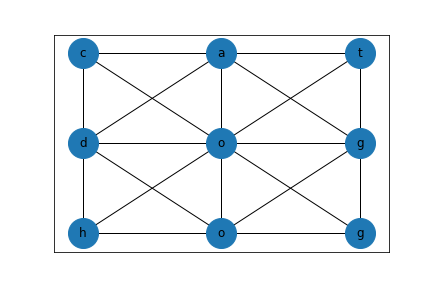

In [10]:
import os
from IPython.display import Image
from glob import glob
m.draw_board(fn='yyy.png')
fn = glob(f'*yyy.png')[0]
Image(fn)

In [11]:
os.unlink(fn)

In [13]:
o, dg, ps = board[0]

In [14]:
print(dg)

DiGraph with 1373 nodes and 1372 edges


In [24]:
for nd, ed in zip(list(dg.nodes(data=True))[0:5], list(dg.edges(data=True))):
    print(nd, ed)

(0, {'tier': 0, 'coord': (0, 0)}) (0, 1, {})
(1, {'tier': 1, 'coord': (1, 0)}) (0, 2, {})
(2, {'tier': 1, 'coord': (1, 1)}) (0, 3, {})
(3, {'tier': 1, 'coord': (0, 1)}) (1, 4, {})
(4, {'tier': 2, 'coord': (0, 1)}) (1, 6, {})


In [20]:
bp.make_digraph((0,0), m, 3)

ori: (0, 0)	tier: 0	node: 1
ori: (0, 0)	tier: 1	node: 4
ori: (0, 0)	tier: 2	node: 19
